## Testing of Logistic Regression with Regularization on Task A2

In [1]:
#Import libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Load one image and its size will be used later
img = cv2.imread('../Datasets/celeba/img/0.jpg',cv2.IMREAD_GRAYSCALE)

In [2]:
#Read the csv. file
df = pd.read_csv('../Datasets/celeba/labels.csv',sep='\t')
#In this task, only the 'smiling' column is useful
y = np.array(df['smiling'])

In [3]:
#Initialization of sample matrix X
X = np.zeros((5000,img.size//4))
#Read and slice each image, then save it as a row of X
for i in range(5000):
    img = cv2.imread('../Datasets/celeba/img/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
    img_Rcompressed = img[np.arange(1,img.shape[0]+1,2)] #Delete one row for each two
    img_compressed = img_Rcompressed[:,np.arange(1,img.shape[1]+1,2)] #Delete one column for each two
    X[i,:] = img_compressed.reshape(1,img_compressed.size)

In [4]:
#Training-validation split in a ratio 3:1
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [5]:
#Definition of sigmoid function
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [6]:
#Definition of prediction function
def logRegrNEWRegrPredict(xTest, theta):
    #Intercept a column of ones before input matrix xTest 
    intercept = np.ones((xTest.shape[0], 1))
    xTest = np.concatenate((intercept, xTest), axis=1)
    #Calculate the probability by sigmoid function 
    y_pred1 = sigmoid(np.dot(xTest, theta))
    #Instead of {0,1}, the output values of y are {-1,1}
    y_pred1[y_pred1 >= 0.5]=1
    y_pred1[y_pred1 < 0.5]=-1
    #Return prediction
    return y_pred1

In [7]:
#Start function of training process
def start(xTrain, yTrain, lamb):
    #Intercept a column of ones before input matrix xTrain
    intercept = np.ones((xTrain.shape[0], 1))
    xTrain = np.concatenate((intercept, xTrain), axis=1)
    
    n = xTrain.shape[0] #Size of training set

    yTrain[yTrain < 1] = 0 #Change every value -1 into 0
    
    #Initializations of feature vecctor
    theta = np.zeros(xTrain.shape[1])
    
    #Initial guess of step parameter
    lr = 0.0001
    
    #Variables used to store the maximal accuracy and its coresponding faeture vector 
    #of previous epoch and the feature vector of maximal validation accuracy
    prev_acc = 0
    max_theta = np.zeros(xTrain.shape[1])
    prev_theta = np.zeros(xTrain.shape[1])
    
    #Gradient desecnt with early stopping
    while True:
        max_acc = 0 #Initialization of maximal accuracy in this epoch
        for maxIt in range(1000): #1,000 iterations in each epoch
            # Calculation of gradient
            z = np.dot(xTrain, theta)
            h = sigmoid(z)
            gradient = np.dot(xTrain.T, np.add(h, -yTrain))/n
            
            #The new feature vector, with regularization here
            theta = (1-lamb)*theta - lr*gradient
            
            #Prediction made by new features
            y_pred = logRegrNEWRegrPredict(x_test,theta)
            
            #The accuracy of this prediction
            acc = accuracy_score(y_pred, y_test)
            
            #Renew maximal accuracy and its feature vector
            if acc > max_acc:
                max_acc = acc
                max_theta = theta
        #Break when the maximal accuracy goes down
        if prev_acc >= max_acc:
            break
        #Otherwise record as previous accuracy and feature vector
        prev_acc = max_acc
        prev_theta = max_theta
    #We want the previous theta, i.e. the maximal theta
    return prev_theta

In [8]:
#List of possible lambda(Regularization parameter)
lamb_list = [0.001,0.0005,0.0001,0.00005,0.00001]
#Initialization of theta received after each training process
theta2 = np.zeros(x_train.shape[1])
#Initialization of accuracy vector
acc = []

#Timer of training processes
time_start = time.time()
for i in range(5):
    #Theta received after the training process with every lambda given
    theta2 = start(x_train, y_train,lamb_list[i])
    #Record this validation accuracy
    acc_lamb = accuracy_score(logRegrNEWRegrPredict(x_test,theta2),y_test)
    acc.append(acc_lamb)
    print(f'finish lamb {i}')



time_end = time.time()
running_time = time_end-time_start
print(f'finish training! total running time: {running_time}s')

E:\Anaconda\envs\lab\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish lamb 0
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish lamb 1
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish lamb 2
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish lamb 3
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish cycle 999
finish lamb 4
finish training! total running time: 3644.0928020477295s


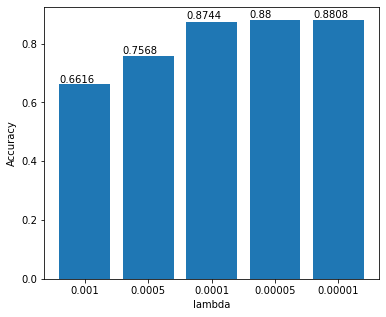

In [9]:
#Paint the validation accuracy of each lambda as a bar chart
#A function defined to label the bars
def autolabel(rects):

    for rect in rects:

        height = rect.get_height()

        plt.text(rect.get_x(), 1.01*height, '%s' % float(height))
        
lamb_list = ['0.001','0.0005','0.0001','0.00005','0.00001']
plt.figure(figsize=(6,5))
bars = plt.bar(lamb_list, acc)
plt.xlabel('lambda')
plt.ylabel('Accuracy')

autolabel(bars)

plt.show()
